In [1]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm 

rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                4 = good, 5 = very good
age             : Age
yrs_married     : No. years married. Interval approximations. See
                original paper for detailed explanation.
children        : No. children
religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                4 = strongly
educ            : Level of education, 9 = grade school, 12 = high
                school, 14 = some college, 16 = college graduate,
                17 = some graduate school, 20 = advanced degree
occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                or unskilled worker; 3 = white-colloar; 4 = teacher
                counselor social worker, nurse; artist, writers;
                technician, skilled worker, 5 = managerial,
                administrative, business, 6 = professional with
                advanced degree
occupation_husb : Husband's occupation. Same as occupation.
affairs         : measure of time spent in extramarital affairs

In [2]:
affairdf=sm.datasets.fair.load_pandas().data

In [3]:
affairdf.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [4]:
affairdf.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [5]:
# we'll have the target variable as the affairs column and try to classify it as yes or no column
def hadaff(x):
    if x>0:
        return 1
    else:
        return 0

In [6]:
affairdf['had_affair']=affairdf.affairs.apply(hadaff)

In [7]:
affairdf

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [8]:
affairdf.groupby(affairdf.had_affair).agg('mean')

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
had_affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


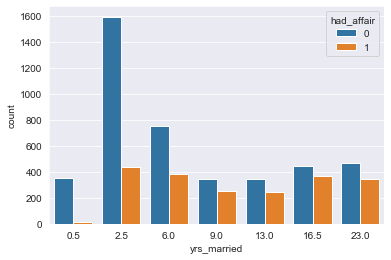

In [9]:
sns.countplot(x='yrs_married',data=affairdf,hue='had_affair')

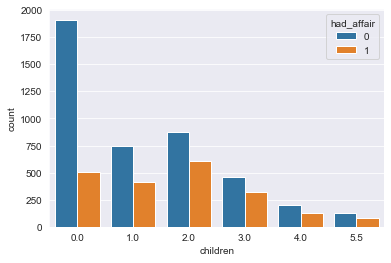

In [10]:
sns.countplot(x='children',data=affairdf,hue='had_affair',)

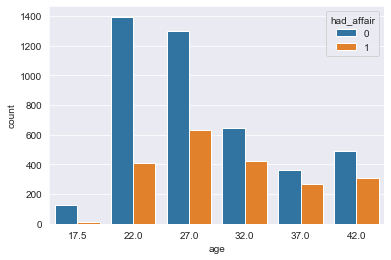

In [11]:
sns.countplot(x='age',data=affairdf,hue='had_affair')

In [60]:
#we find that the occupation column is column of catergorical variable. We encode it therefore.
occ_dummy=pd.get_dummies(affairdf['occupation'])
hocc_dummy=pd.get_dummies(affairdf['occupation'])

In [61]:
#occ_dummy.columns=['student semi-white-collar white-colloar technician business professional'.split()]

occ_dummy.columns=['occ1','occ2','occ3','occ4','occ5','occ6']
hocc_dummy.columns=['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [62]:
occ=pd.concat([occ_dummy,hocc_dummy],axis=1)
occ.head()

,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,1,0,0,0


In [63]:
X=affairdf.drop(['occupation','occupation_husb','had_affair','affairs'],axis=1)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ
0,3.0,32.0,9.0,3.0,3.0,17.0
1,3.0,27.0,13.0,3.0,1.0,14.0
2,4.0,22.0,2.5,0.0,1.0,16.0
3,4.0,37.0,16.5,4.0,3.0,16.0
4,5.0,27.0,9.0,1.0,1.0,14.0


In [64]:
X = pd.concat([X,occ],axis=1)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0,1,0,0,0,0,0,1,0,0,0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,0,1,0,0,0,0,0,1,0,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,0,1,0,0,0,0,0,1,0,0,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,0,1,0,0,0,0,0,1,0,0,0


In [65]:
Y=affairdf.had_affair
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: had_affair, dtype: int64

In [66]:
# now we get rid of few colummns to remove multicollinearity, for example, occ1 occ2 occ3 occ4 occ5 occ6, if we know one of these values
#we can predict the others 5 values.
X.drop(['occ1','hocc1'],inplace=True,axis=1)


In [67]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,1,0,0,0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,1,0,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,1,0,0,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,1,0,0,0


In [75]:
Y=np.ravel(Y)#was required earlier, but no longer necessary

In [77]:
# Create LogisticRegression model
log_model = LogisticRegression()

# Fit our data
log_model.fit(X,Y)

# Check our accuracy
log_model.score(X,Y)


C:\Users\mrb97\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7268300345585925

In [78]:
Y.mean()

0.3224945020420987

We got a 73% accuracy rating. This means that if our model just simply guessed "no affair" we would have had 1-0.32=0.68 accuracy (or 68%) accuracy. So while we are doing better than the null error rate, we aren't doing that much better.
This is known as checking the null error rate.

In [87]:
DataFrame(zip(X.columns, np.round_(np.transpose(log_model.coef_),4)))

,0,1
0,rate_marriage,[-0.6995]
1,age,[-0.0556]
2,yrs_married,[0.1038]
3,children,[0.0189]
4,religious,[-0.3679]
5,educ,[0.0071]
6,occ2,[0.2663]
7,occ3,[0.4225]
8,occ4,[0.2893]
9,occ5,[0.5878]


In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2)

In [89]:
# Make a new log_model
log_model2 = LogisticRegression()

# Now fit the new model
log_model2.fit(X_train, Y_train)

C:\Users\mrb97\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
predicted=log_model2.predict(X_test)

In [95]:
metrics.accuracy_score(Y_test,predicted)

0.7237048665620094

In [96]:
log_model2.score(X_test,Y_test)

0.7237048665620094